### Notebook index

[3 Minimal examples](03-minimal.ipynb)  
[4 Plotting chromosomes](04-plotting.ipynb)   
[5 Multiple OTUs](05-multiple.ipynb)    
[6 Changing units](06-units.ipynb)  
[7 GISH](07-gish.ipynb)  
[8 Groups](08-groups.ipynb)  
[9 Circular Plots](09-circular.ipynb)  
[10 Plotting alongside phylogeny](10-phylogeny.ipynb)  
[11 Citrus](11-citrushelp.ipynb)  
[12 Human Karyotype](12-human.ipynb)  

# Circular Plots

In [1]:
# General jupyter instructions

In [2]:
# press Ctrl + Enter to RUN active cell

# SHOW keyboard shortcuts Ctrl + M then H (only jupyter notebooks and colab)

# Ctrl + D (or X) DELETE a line of code

# press Ctrl + M to escape from cell (opposite to ENTER)

# then !
# B to ADD cell below or A above
# M to turn code cell into MARKDOWN
# Y turn markdown to CODE
# O to toggle OUTPUT
# D D to DELETE cell

# If in jupyter-lab:
# collapse cell clicking in the blue left bar
# use the settings menu to use the dark theme

# if in colab:
# remove bar at 80 in tools, preferences, 80 -> 0

In [3]:
# install if necessary

if (system.file(package = "idiogramFISH") == '') {
  install.packages("idiogramFISH")
}

library(idiogramFISH)

version 2.0.6 See help: ?idiogramFISH - browseVignettes('idiogramFISH') - https://ferroao.gitlab.io/manualidiogramfish



## Example with monocen. and holocen.


Loading required package: plyr



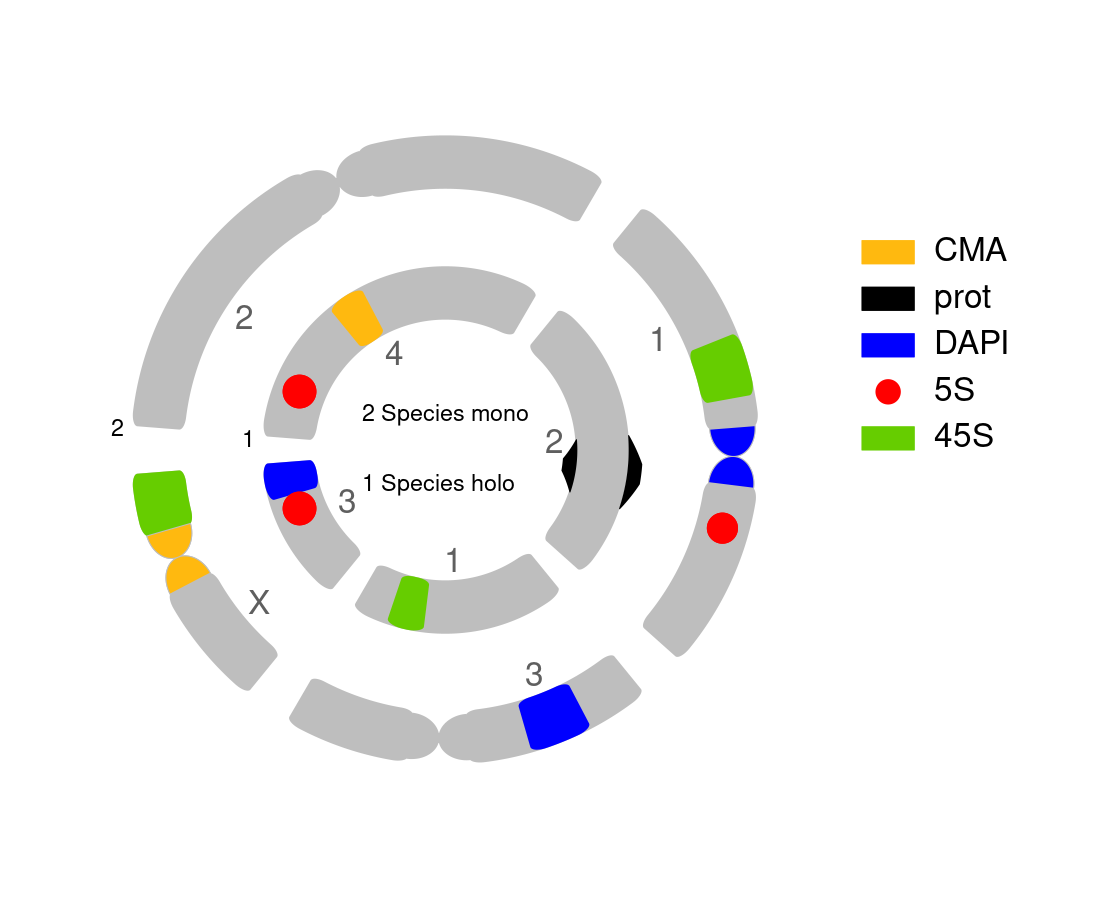

In [4]:
{
  require(idiogramFISH)
  require(plyr)
  dfOfChrSize$OTU   <- "Species mono"
  dfChrSizeHolo$OTU <- "Species holo"

  monoholoCS <- plyr::rbind.fill(dfOfChrSize,dfChrSizeHolo)

  dfOfMarks2$OTU    <- "Species mono"
  dfMarkPosHolo$OTU <- "Species holo"

  monoholoMarks <- plyr::rbind.fill(dfOfMarks2,dfMarkPosHolo)
  monoholoMarks[which(monoholoMarks$markName=="5S"),]$markSize<-.5
  
  monoholoMarks[10,]$markName <- "prot"
  monoholoMarks[10,]$markSize <- 1
  dfMarkColor<-rbind(dfMarkColor,c("prot","black","exProtein"))
}
par(mar=rep(0,4))
options(repr.plot.width = 5.5, repr.plot.height = 4.5, repr.plot.res = 200)
suppressMessages(
plotIdiograms(dfChrSize  = monoholoCS,   # data.frame of chr. size
              dfMarkColor= dfMarkColor,  # df of mark style
              dfMarkPos  = monoholoMarks,# df of mark positions, includes cen. marks

              squareness =5,             # vertices squareness
              addOTUName = TRUE,         # add OTU names
              distTextChr = .5,          # separ. among chr. and text and among chr. name and indices

              chrId="original",          # use original name of chr.
              OTUTextSize = .7,          # size of OTU name

              legendHeight= 1,           # height of legend labels
              legendWidth = 1,           # width of legend labels
              # ,legend="inline"
              fixCenBorder = TRUE,       # use chrColor as border color of cen. or cen. marks

              xlimLeftMod = -2,          # modify xlim left argument of plot
              xlimRightMod=  2,          # modify xlim right argument of plot
              ylimTopMod  = -1,
              ylimBotMod  = 1          # modify ylim bottom argument of plot

              
              ,useOneDot = TRUE
              
              # GRAPHICAL PARAMETERS FOR CIRCULAR PLOT
              
              ,circularPlot = TRUE       # circularPlot
              ,shrinkFactor = .9         # percentage 1 = 100% of circle with chr.
              ,circleCenter = 3          # X coordinate of circleCenter (affects legend pos.)
              ,chrLabelSpacing = .9      # chr. names spacing
              
              ,OTUsrt = 0                # angle for OTU name (or number)
              ,OTUplacing = "number"     # Use number and legend instead of name. See OTUcentered
              ,OTUjustif = 0             # OTU names justif. left.
              ,OTULabelSpacerx = -0.8    # modify position of OTU label, when OTUplacing="number" or "simple"
              ,OTUlegendHeight = 1.5     # space among OTU names when in legend - OTUplacing
              ,separFactor = 0.75
)
)

</div>

## Recreating circular karyotype of [@Golczyk2005]

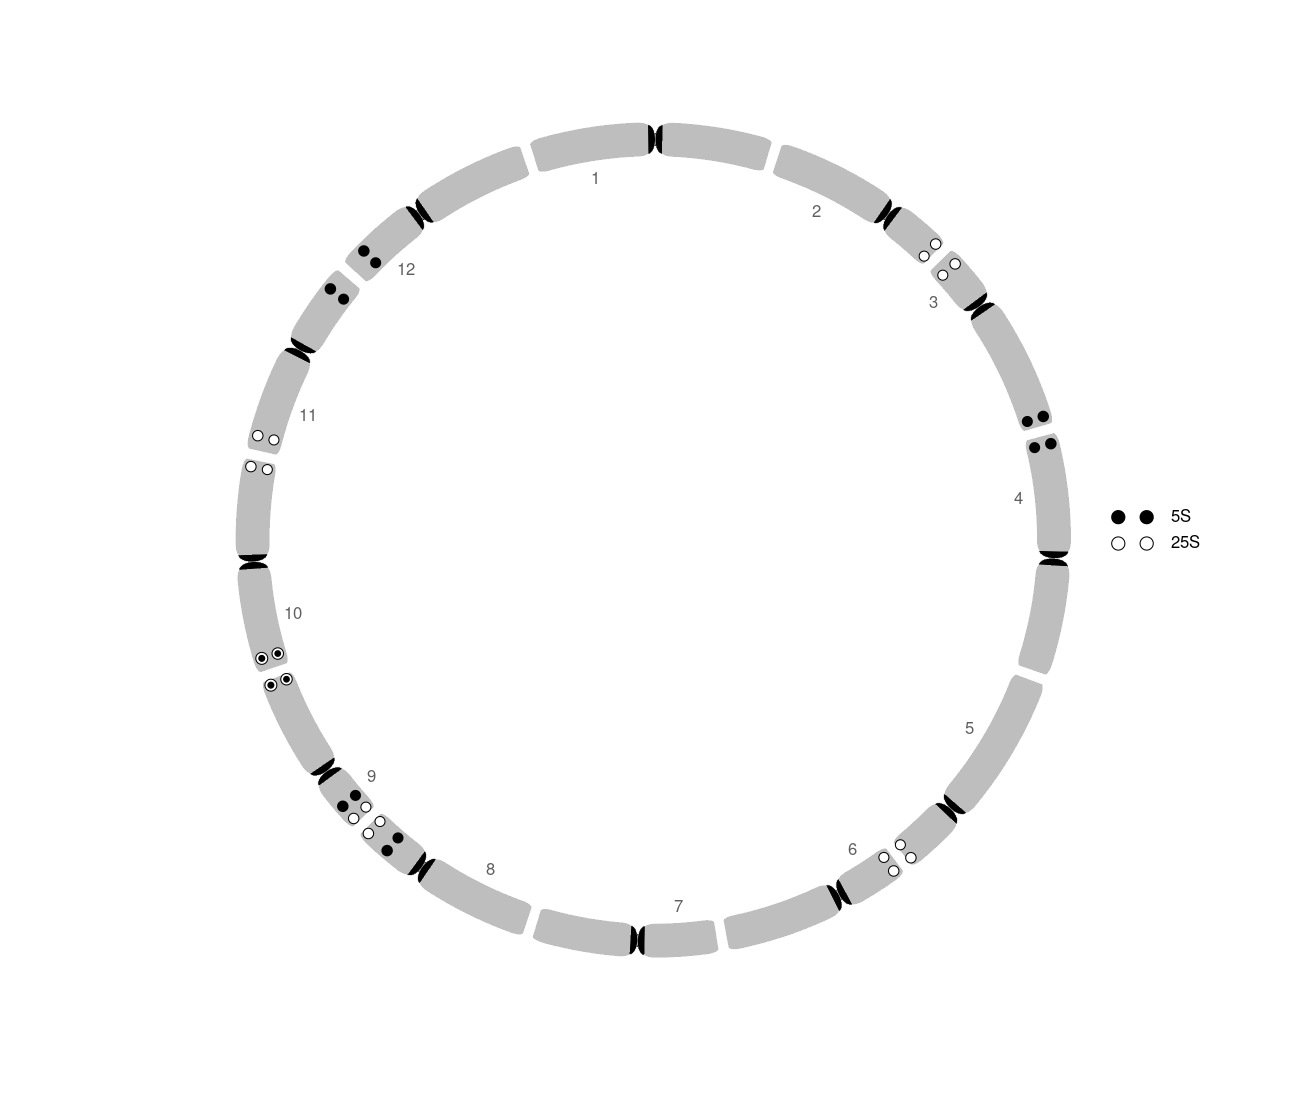

In [5]:

# First swap short and long arms to show the same rotation of the article

listradfs<-swapChrRegionDfSizeAndMarks(traspadf,traspaMarks,c("3","6","7","9","12") )

# Create marks' characteristics

dfMarkColor5S25S<-read.table(text="    markName markColor  style
        5S       black dots
       25S       white dots"  ,  header=TRUE, stringsAsFactors=FALSE,fill=TRUE)

options(repr.plot.width = 13, repr.plot.height = 11, repr.plot.res = 100)
suppressMessages(
plotIdiograms(dfChrSize = listradfs$dfChrSize,  # d.f. of chr. sizes
              dfMarkPos = listradfs$dfMarkPos,  # d.f. of marks' positions
              dfMarkColor = dfMarkColor5S25S,   # d.f. of mark characteristics
              cenColor  = "black",              # cen. color 
              squareness = 5,                   # corner squareness
              chrWidth = 1,                     # chr. width
              orderChr = "name"                 # order chr. by name

              ,addOTUName = FALSE               # do not add OTU name
              ,legendHeight = 3                 # labels separ. y axis
              
              # circular plot parameters
              ,circularPlot=TRUE                   
              ,radius=5                         # basic radius
              ,useOneDot=FALSE                  # use two dots in dot marks
              ,chrLabelSpacing = 1              # chr. name spacing
              ,rotation = 0.1                   # anti-clockwise start site in x*pi radians, from top (0)
              ,shrinkFactor = .95               # % of circle use
)
)

## Plasmid data from genBank

Using `upArrow` and `downArrow` styles, clockwise and anti-clockwise, respectively.

In [6]:
if (system.file(package = "rentrez") == '') {
  install.packages("rentrez")
}

features in mylist:



[1] "gbdfMain"         "gbdfAssemblyMeta" "gbdfAnnoMeta"     "source"          
[5] "gene"             "CDS"

Authors:



[1] "Johnson,S.L., Minogue,T.D., Teshima,H., Davenport,K.W., Shea,A.A.,; Miner,H.L., Wolcott,M.J. and Chain,P.S."

By default 5S are plotted as dots, to change this behavior make your own dfMarkColor data.frame

Not enough colors in mycolor parameter, will be recycled



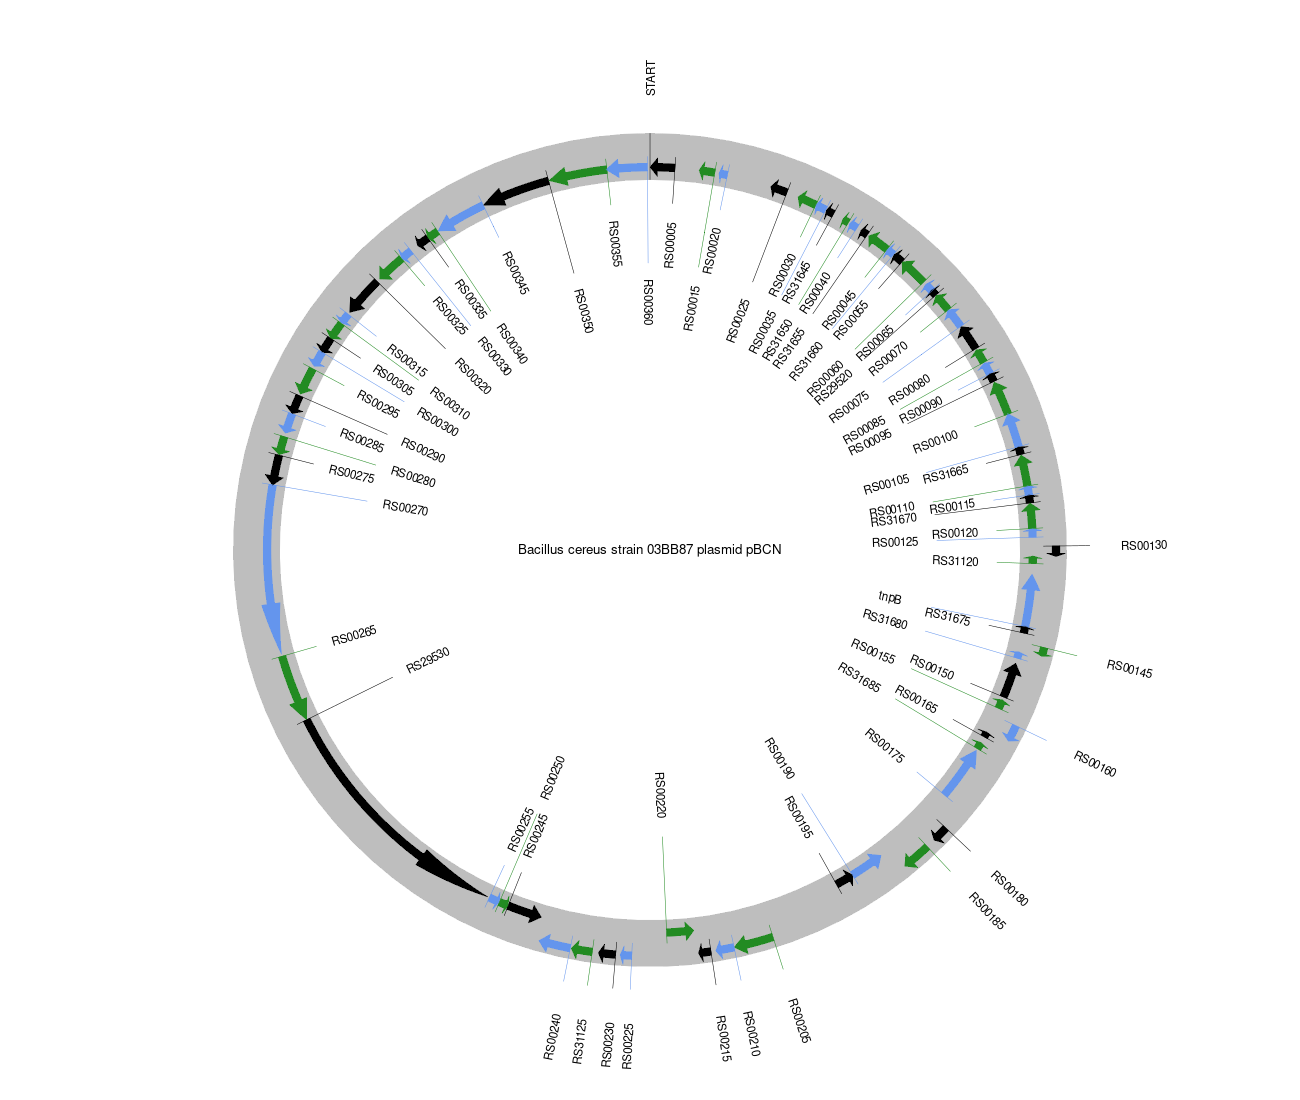

In [7]:

# data from: https://www.ncbi.nlm.nih.gov/nuccore/NZ_CP009939.1

#install.packages("rentrez")
library(rentrez)
# search string
bcereus <- "Bacillus cereus strain 03BB87 plasmid pBCN, complete sequence"
bcereus_search <- rentrez::entrez_search(db="nuccore", term = bcereus)
# get summaries
esummaries<-rentrez::entrez_summary(db = "nuccore", id = bcereus_search$ids)

# download plasmid data
# From the entrez formats:
# https://www.ncbi.nlm.nih.gov/books/NBK25499/table/chapter4.T._valid_values_of__retmode_and/
# idiogramFISH can read only:
rentrezDownloadPlas  <- rentrez::entrez_fetch(db="nuccore", 
                                              id = bcereus_search$ids[1], 
                                              rettype="gbwithparts", 
                                              retmode = "text")

mylist<-genBankReadIF(rentrezDownloadPlas)

# data.frames in mylist
message("features in mylist:")
names(mylist)

# mylist$source
# View(mylist$gbdfMain)
# View(mylist$gbdfAssemblyMeta)
# mylist$gbdfAnnoMeta
# View(mylist$CDS)
# View(mylist$gene)

# Authors of plasmid sequence
message("Authors:")
paste(mylist$gbdfMain[which(mylist$gbdfMain$field=="AUTHORS"),][1,2] )

# create plasmid size data data.frame
{
myPlasmiddf <- data.frame(chrName=1, chrSize=mylist$source$end)
myPlasmiddf$OTU<-mylist$gbdfMain[which(mylist$gbdfMain$field=="DEFINITION"),]$value
myPlasmiddf$OTU<-gsub(", complete sequence.","",myPlasmiddf$OTU)

# Creating mark info data.frame

mylistSel<- mylist[which(names(mylist) %in% "gene")]
mylistSelDF <- dplyr::bind_rows(mylistSel, .id="feature")

mylistSelDF$markPos <-pmin(as.numeric(mylistSelDF$begin),as.numeric(mylistSelDF$end) )
mylistSelDF$markSize<-abs(as.numeric(mylistSelDF$end)-as.numeric(mylistSelDF$begin) )
mylistSelDF$markName<-mylistSelDF$locus_tag

# orientation of arrows
mylistSelDF$style<-ifelse(mylistSelDF$isComplement,"downArrow","upArrow")

# Replace codes with names
mylistSelDF[which(!is.na(mylistSelDF$gene) ),]$markName<-
  mylistSelDF[which(!is.na(mylistSelDF$gene) ),]$gene

# subset columns
marksDfPlas<-mylistSelDF[,c("markName","markPos","markSize","style"),]

# add OTU name
marksDfPlas$OTU<-myPlasmiddf$OTU

# add mandatory column
marksDfPlas$chrName<-myPlasmiddf$chrName

# organize inner arrows (downArrow) in two columns avoiding overlap

protVal <- .5     # this values (and others) must be the same 
circVal <- TRUE   # in plotIdiograms function
rotaVal <- 0

suppressMessages(
marksDfPlasCols<-namesToColumns(marksDfPlas, myPlasmiddf, 
                        markType=c("downArrow"),
                        amountofSpaces=10,colNumber=2,
                        protrudingInt=1.3, protruding = protVal, 
                        circularPlot = circVal,
                        rotation=rotaVal
                        )
)

# add marker for start pos.
colnames(marksDfPlasCols)
marksDfPlasCols<-rbind(marksDfPlasCols,c(paste0("START",paste0(rep(" ",0), collapse="")),1,NA,"square",myPlasmiddf$OTU,1,NA) )

# create mark general data data.frame
markStyle   <- makedfMarkColorMycolors(
  unique(marksDfPlasCols$markName), c("black","forestgreen","cornflowerblue") )

# arrows
markStyle$style      <- marksDfPlasCols$style[match(markStyle$markName, marksDfPlasCols$markName)]
markStyle$protruding <- marksDfPlasCols$protruding[match(markStyle$markName, marksDfPlasCols$markName)]

# prefix to remove from marks
mypattern<-sub("([[:alnum:]]+_).*","\\1",trimws(marksDfPlas$markName[1]) )
}
library(idiogramFISH)
par(mar=rep(0,4), oma = rep(0,4) )

options(repr.plot.width = 13, repr.plot.height = 11, repr.plot.res = 100)
suppressMessages(
plotIdiograms(dfChrSize = myPlasmiddf,  # plasmid size d.f.
              dfMarkPos = marksDfPlasCols,  # mark pos d.f.
              dfMarkColor = markStyle,  # mark style d.f.
              
              squareness = 21,          # corners not rounded
              chrWidth = 0.5,           # chr. width
              chrId="",                 # no chr. name
              
              markLabelSize=.7,         # font size of labels
              pattern=mypattern,        # remove pattern from mark names
              cMBeginCenter = TRUE,
              legend ="inline",
              protruding= protVal,
              
              ylimBotMod = 0,           # modify plot size
              ylimTopMod = 0, 
              xlimLeftMod = 2, 
              
              # circular params.
              circularPlot = circVal,   # circular
              rotation=rotaVal,         # begin plasmid in top
              
              radius=2.5,
              shrinkFactor = 1,         # use 100% of circle
              labelSpacing = 1.7,       # label spacing from chr.
              labelOutwards = TRUE,     # label projected based on mark angle
              
              OTUjustif = 0.5,          # OTU name justif. centered.
              OTUplacing = "simple"     # plasmid name place. See OTUcentered
              ,OTUTextSize = .8         # font size of OTU name
)
)

</div>
<div class="goright95">
<a href="#header">top <i class="fa fa-caret-square-o-up" aria-hidden="true"></i></a>
</div>

## Prokaryote chromosome from genBank 

<div class="fold s">

[1] "'Nostoc azollae' 0708 plasmid pAzo02, complete sequence"
[1] "'Nostoc azollae' 0708 plasmid pAzo01, complete sequence"
[1] "'Nostoc azollae' 0708, complete sequence"
[1] "'Nostoc azollae' 0708 plasmid pAzo02, complete sequence"
[1] "'Nostoc azollae' 0708 plasmid pAzo01, complete sequence"
[1] "'Nostoc azollae' 0708 strain 708 23S ribosomal RNA gene, complete sequence"
[1] "'Nostoc azollae' 0708 strain 0708 5S ribosomal RNA, complete sequence"
[1] "'Nostoc azollae' 0708, complete genome"


[1] 3 8

features in mylistChr:



[1] "gbdfMain"     "gbdfAnnoMeta" "source"       "gene"         "CDS"         
 [6] "tRNA"         "regulatory"   "ncRNA"        "rRNA"         "misc_feature"
[11] "tmRNA"

Authors:



[1] "Ran,L., Larsson,J., Vigil-Stenman,T., Nylander,J.A., Ininbergs,K.,; Zheng,W.W., Lapidus,A., Lowry,S., Haselkorn,R. and Bergman,B."

By default 5S are plotted as dots, to change this behavior make your own dfMarkColor data.frame

Not enough colors in mycolor parameter, will be recycled



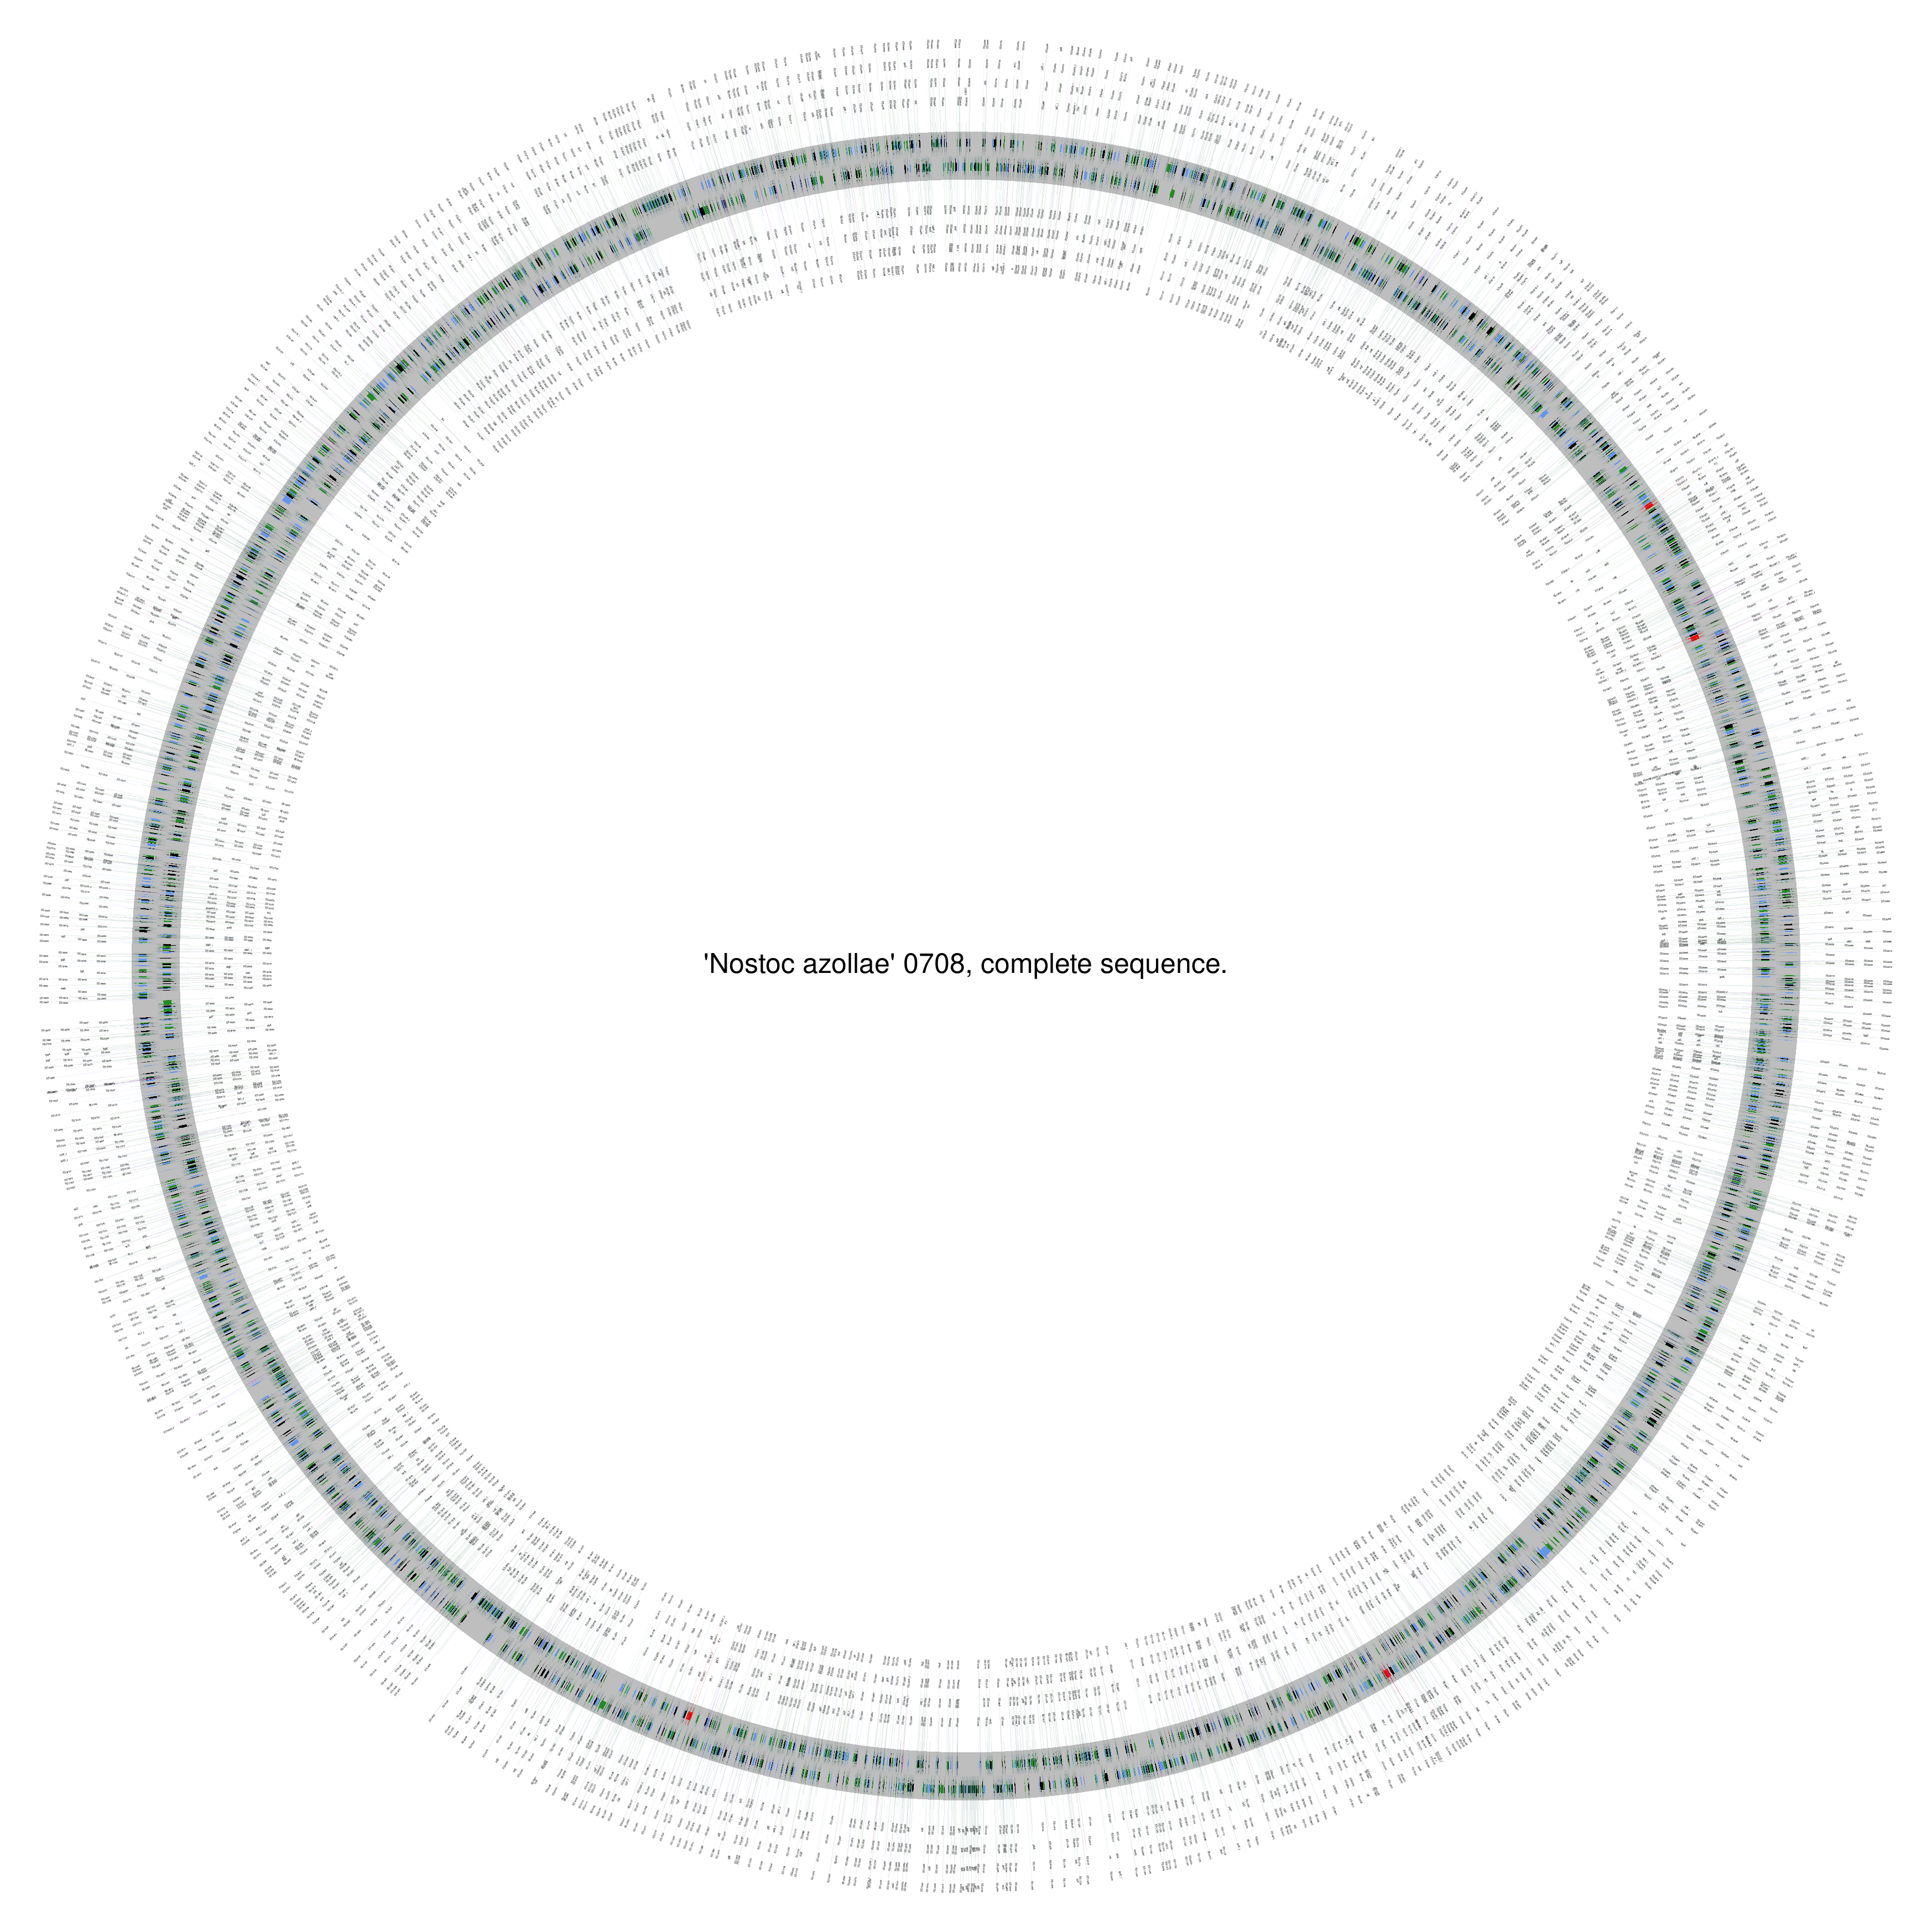

In [8]:

# Option 1: Download prokaryote genome data from:
# https://www.ncbi.nlm.nih.gov/nuccore/NC_014248.1
# Choose Customize View -> Basic Features -> genes, CDS
# Send To -> File -> Create File

# Use your file name:
dataChr.gb <- "nostoc.gb" # 5 Mbytes

# Option 2: Download with rentrez package

library(rentrez)
# search string
nostoc <- "'Nostoc azollae' 0708, complete"
nostoc_search <- rentrez::entrez_search(db="nuccore", term=nostoc)
# get summaries
esummariesNostoc<-rentrez::entrez_summary(db="nuccore", id=nostoc_search$ids)
# select only perfect matches
select<-numeric()
for (i in 1:length(esummariesNostoc)){
  print(esummariesNostoc[[i]]$title)
  if(esummariesNostoc[[i]]$title %in% grep(nostoc,esummariesNostoc[[i]]$title, value=T) ){ 
    select<-c(select,i) 
  }
}
select
# 3 8

# download chr. data
dataChr.gb  <- rentrez::entrez_fetch(db="nuccore", 
                                     id=nostoc_search$ids[select][1], 
                                     rettype="gbwithparts", 
                                     retmode = "text")
# START: 
library(idiogramFISH)

mylistChr<-genBankReadIF(dataChr.gb) # 9 seconds
message("features in mylistChr:")
names(mylistChr)
# "gbdfMain"     "gbdfAnnoMeta" "source"       "gene"         "CDS"          "tRNA"
# "regulatory"   "ncRNA"        "rRNA"         "misc_feature" "tmRNA"

# Authors of sequence
message("Authors:")
paste(mylistChr$gbdfMain[which(mylistChr$gbdfMain$field=="AUTHORS"),][1,2] )
# [1] "Ran,L., Larsson,J., Vigil-Stenman,T., Nylander,J.A., Ininbergs,K.,;
# Zheng,W.W., Lapidus,A., Lowry,S., Haselkorn,R. and Bergman,B."

# create chr. size data data.frame
# columns chrName and chrSize
myProkaryotedf <- data.frame(chrName=1, chrSize=mylistChr$source$end)
# column with OTU name
myProkaryotedf$OTU<-mylistChr$gbdfMain[which(mylistChr$gbdfMain$field=="DEFINITION"),]$value
myProkaryotedf$OTU<-gsub(", complete genome.","",myProkaryotedf$OTU)

# Creating mark info data.frame excluding some features
mylistChrSel  <- mylistChr[which(names(mylistChr) %in%
                                   setdiff( names(mylistChr) , c("gbdfMain","gbdfAnnoMeta","source","CDS") ) )]
# or:
# mylistSel<- mylistChr[which(names(mylistChr) %in% "CDS")]

# transform list into data.frame
mylistChrDF<-dplyr::bind_rows(mylistChrSel, .id="feature")
# add necessary columns
mylistChrDF$markPos <-pmin(as.numeric(mylistChrDF$begin),as.numeric(mylistChrDF$end) )
mylistChrDF$markSize<-abs(as.numeric(mylistChrDF$end)-as.numeric(mylistChrDF$begin) )
mylistChrDF$markName<-mylistChrDF$locus_tag

# Replace codes with genes, and replace NAs in markNames (locus_tag)
mylistChrDF[which(!is.na(mylistChrDF$gene) ),]$markName<-
  mylistChrDF[which(!is.na(mylistChrDF$gene) ),]$gene

mylistChrDF[which(!is.na(mylistChrDF$regulatory_class) ),]$markName<-
  mylistChrDF[which(!is.na(mylistChrDF$regulatory_class) ),]$regulatory_class

# make unique names, otherwise some marks may share style and color
mylistChrDF$markName<-make.uniqueIF(mylistChrDF$markName)

# when no markName and note available:
mylistChrDF[which(is.na(mylistChrDF$markName) ),]$markName<-
  sub("([[:alpha:] ]+);.*","\\1", mylistChrDF[which(is.na(mylistChrDF$markName) ),]$note )

# orientation of arrows 
mylistChrDF$style<-ifelse(mylistChrDF$isComplement,"downArrow","upArrow")

# select main columns for data.frame of marks' positions
marksDfChr<-mylistChrDF[,c("markName","markPos","markSize","feature","isJoin","style"),]

marksDfChr$OTU<-myProkaryotedf$OTU
# add mandatory column
marksDfChr$chrName<-myProkaryotedf$chrName

# Organize mark names in columns to avoid overlap
rotaVal<-0
suppressMessages(
marksDfChrCols<-namesToColumns(marksDfChr, myProkaryotedf, 
                               markType=c("downArrow","upArrow"),
                               amountofSpaces=13,colNumber=4,
                               protrudingInt=0.5,
                               rotation = rotaVal)
)

{
  # add marker for start pos.
  colnames(marksDfChrCols)
  marksDfChrCols<-rbind(marksDfChrCols
                        ,c("                                                           START",1,NA
                           ,"start",FALSE,"square",myProkaryotedf$OTU,1,NA) 
  )
  
  # unique(marksDfChrCols$markName)
  
  # create mark general data data.frame
  markStyleNostoc   <- makedfMarkColorMycolors(
    unique(marksDfChrCols$markName), c("black","forestgreen","cornflowerblue") )
  
  unique(marksDfChrCols$feature)
  # [1] "gene"         "tRNA"         "regulatory"   "ncRNA"        "rRNA"       "tmRNA"        "start"       
  unique(marksDfChrCols$isJoin)
  # [1] "FALSE"
  
  # change some colors depending on feature
  markStyleNostoc[which(markStyleNostoc$markName %in%
                          marksDfChrCols[which(marksDfChrCols$feature %in% c("tRNA","tmRNA") ),]$markName
  ),]$markColor<-"magenta"
  
  markStyleNostoc[which(markStyleNostoc$markName %in%
                          marksDfChrCols[which(marksDfChrCols$feature %in% c("regulatory","ncRNA") ),]$markName
  ),]$markColor<-"tomato3"
  
  markStyleNostoc[which(markStyleNostoc$markName %in%
                          marksDfChrCols[which(marksDfChrCols$feature %in% "rRNA" ),]$markName
  ),]$markColor<-"red2"
  
  markStyleNostoc[which(markStyleNostoc$markName %in%
                          marksDfChrCols[which(marksDfChrCols$feature %in% c("misc_binding","misc_feature" ) ),]$markName
  ),]$markColor<-"lightsalmon"
  
  # or:
  # When isJoin is TRUE (CDS feature included)
  # markStyleNostoc[which(markStyleNostoc$markName %in%
  #                   marksDfChrCols[which(marksDfChrCols$isJoin==TRUE),]$markName
  # ),]$markColor<-"red"
  
  # arrows info. to d.f. of charac.
  markStyleNostoc$style      <- marksDfChrCols$style[match(markStyleNostoc$markName, marksDfChrCols$markName)]
  markStyleNostoc$protruding <- marksDfChrCols$protruding[match(markStyleNostoc$markName, marksDfChrCols$markName)]
  
  mypattern<-sub("([[:alnum:]]+_).*","\\1",trimws(marksDfChrCols$markName[1]) )
}

# png("NOSTOC.png", width=2795, height=2795) # 2.7 Mb increase size to increase resolution
# pdf("NOSTOC.pdf",   width=2795/80,  height=2795/80) 
# svg("NOSTOC.svg",   width=2795/80,  height=2795/80)  # 42 Mb vectorized

par(mar=rep(0,4))
options(repr.plot.width = 2795/80, repr.plot.height = 2795/80, repr.plot.res = 100)
suppressMessages(
plotIdiograms(dfChrSize = myProkaryotedf,   # chr. data d.f.
              dfMarkPos = marksDfChrCols,   # mark pos d.f.
              dfMarkColor = markStyleNostoc,# mark style d.f. style
              
              squareness = 21,          # corners not rounded
              n=150,                    # number of vertices in rounded items.
              markN=2,
              
              chrWidth = 4,             # chr. width
              lwd.chr  = 0.1,
              chrId = "none",           # no chr. name
              legend = "inline",        # for arrows, this mimics cM and cMLeft marks
              # 
              markLabelSize=0.25,       # font size of labels
              pattern= mypattern,       # remove pattern from mark names
              # 
              ylimBotMod = 5,           # modify plot size
              ylimTopMod = 5,
              xlimLeftMod = 5,
              xlimRightMod = 5,
              # 
              # # circular plot params.
              circularPlot = TRUE,      # circular
              shrinkFactor = 1,         # use 100% of circle
              labelSpacing = 1,         # label spacing from chr.
              rotation=rotaVal,         # begin chr. in top
              labelOutwards = TRUE      # label projected based on mark angle
              # 
              ,OTUjustif = 0.5          # OTU name centered
              ,OTUplacing = "simple"    # location of OTU name, see OTUcentered
              ,radius = 8               # radius of circle
              ,OTUTextSize = 3          # font size of OTU name
              ,cMBeginCenter = TRUE     # label of arrows (inline) start in the middle
) 
)
#dev.off()           

</div>